# **Programming for Data Science - 21KHDL1**
# **Final Project**
# **Topic:** Life Expectancy (WHO)

---

### **Student Information**:

StudentID|Full Name
-|-
21127012|Tran Huy Ban
21127143|Nguyen Minh Quan

<br>

---

## **Table of contents**

[Overview](#overview)

[Data Collection](#collect)

[Data Pre-processing and Exploration](#pre-process_explore)

[Quickview of the data](#quickview)

[Questions](#quesion)

[Reflection](#reflection)

[References](#references)

---

## **Overview** <a name="overview"></a>

<center>
<h3>
    <b>
     Life Expectancy: Exploring the demographic factors influencing longevity, accompanied by the economic and health structural issues of each country over the years.
    </b>
</h3>
    <img style="padding:10px" src="https://www.upstate.edu/whatsup/images/2021/051721-life-expectancy-has-dropped-why-it-matters.jpg" width="600"/>
</center>
Demography is no longer a distant concern when we focus on the human factors of a nation, accompanied by considerations of the financial economic structure, national potential, and health and education-related issues. In this dataset, we delve deeper into the field of human lifespan. Here, demographic factors and health issues will be key focal points for us to research and gain a deeper understanding of human longevity.
---

### **Libraries used**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd

---

## **Data Collection** <a name="collect"></a>

- **Data about**: The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. This dataset has considered data from year 2000-2015 for 193 countries  

- **Source**: From Kaggle 

- **Collect data and License**: The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries and collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website with the help of Deeksha Russell and Duan Wang.

In [2]:
df = pd.read_csv('Data/LifeExpectancyData.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


---

## **Data Pre-processing and Exploration** <a name="pre-process_explore"></a>

**1. Firstly, we should find out what our dataset contains.**

In [3]:
df.shape

(2938, 22)

We can see that in this Dataset, there are:
- ``2938 rows``
- ``22 columns``

**2. What is the meaning of each row ?**

Each data line represents demographic information and details on population, demographics, and economic status of **each country** for **each year**.

**3. Does the data have duplicate rows ?**


In [4]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print('No duplicate rows found')
else:
    print('Duplicate rows found')
    print(duplicate_rows)


No duplicate rows found


**4. What is the meaning of each columns ?**

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', ' BMI ', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.rename(columns={'Life expectancy ':'Life expectancy', ' BMI ': 'BMI'}, inplace=True)

**Describe meaning of each column**

| Column                           | Describe                                                                                         |
|----------------------------------|--------------------------------------------------------------------------------------------------|
| Country                          | Name of each country                                                                             |
| Year                             | The year of data recording                                                                       |
| Status                           | State of development of the country in the year under consideration (Developed, Developing)      |
| Life expectancy                  | Average life expectancy of that country                                                          |
| Adult Mortality                  | Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)                        |
| Infant deaths                    | Number of Infant Deaths per 1000 population                                                      |
| Alcohol                          | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                       |
| Percentage expenditure           | Expenditure on health as a percentage of Gross Domestic Product per capita (%)                   |
| Hepatitis B                      | Hepatitis B (HepB) immunization coverage among 1-year-olds (%)                                   |
| Measles                          | Measles - number of reported cases per 1000 population                                           |
| BMI                              | Average Body Mass Index of entire population                                                     |
| Under-five deaths                | Number of under-five deaths per 1000 population                                                  |
| Polio                            | Polio (Pol3) immunization coverage among 1-year-olds (%)                                         |
| Total expenditure                | General government expenditure on health as a percentage of total government expenditure (%)                                |
| Diphtheria                       | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)       |
| HIV/AIDS                         | Deaths per 1 000 live births HIV/AIDS (0-4 years)                                                |
| GDP                              | Gross Domestic Product per capita (in USD)                                                       |
| Population                       | Population of the country                                                                        |
| Thinness 10-19 years             | Prevalence of thinness among children and adolescents for Age 10 to 19 (%)                      |
| Thinness 5-9 years               | Prevalence of thinness among children for Age 5 to 9 (%)                                          |
| Income composition of resources  | Human Development Index in terms of income composition of resources (index ranging from 0 to 1)  |
| Schooling                        | Number of years of Schooling (years)                                                              |


**5. What is the current data type of each columns? Are there any columns having inappropriate data types ?**

In [7]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness 10-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Overall, it can be seen that almost all columns have suitable data types.

**6. With each ``categorical column``, how are values distributed?**

**a. What is the percentage of missing values?**

In [8]:
categorical_df = df.select_dtypes(include=['object'])
missing_percentage = categorical_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Country: 0.0%
- Status: 0.0%


**b. How many different values? Are they abnormal?**

In [9]:
for col in categorical_df.columns:
    print(f'Column: {col}')
    unique_values = np.unique(categorical_df[col])
    print(f'- Number of unique values: {len(unique_values)}')
    print(f'-Some unique values: {unique_values[:5]}\n')

Column: Country
- Number of unique values: 193
-Some unique values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda']

Column: Status
- Number of unique values: 2
-Some unique values: ['Developed' 'Developing']



**7. With each ``numerical column``, how are values distributed?**

**a. What is the percentage of missing values?**

In [10]:
numeric_df = df.select_dtypes(include=['number'])
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Year: 0.0%
- Life expectancy: 0.34%
- Adult Mortality: 0.34%
- infant deaths: 0.0%
- Alcohol: 6.6%
- percentage expenditure: 0.0%
- Hepatitis B: 18.82%
- Measles: 0.0%
- BMI: 1.16%
- under-five deaths: 0.0%
- Polio: 0.65%
- Total expenditure: 7.69%
- Diphtheria: 0.65%
- HIV/AIDS: 0.0%
- GDP: 15.25%
- Population: 22.19%
- thinness 10-19 years: 1.16%
- thinness 5-9 years: 1.16%
- Income composition of resources: 5.68%
- Schooling: 5.55%


**b. Min? max? Are they abnormal?**

In [11]:
numeric_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**8. Fill in the ``missing data`` currently blank in the dataset.**

- For the current demographic dataset, it can be observed that there are some `numerical columns` with missing data. 

- Surprisingly, three columns, namely `Hepatitis B`, `GDP`, `Population` exhibit a notably high rate of missing data. According to the data description, this is attributed to certain countries such as Vanuatu, Tonga, Togo, Cabo Verde,... not disclosing and not being extensively researched.

- Before diving into how to fill in missing data, we will learn more about the nature of the missing data for each corresponding column. In it, we will conduct tests with blank data for each column and corresponding country. Then count the number of data blanks to know the number of years missing data for the corresponding column and country to calculate the method.

- In this section, we only consider these 3 columns because the data in these 3 columns has a too high missing rate and we will focus on these 3 columns. For the other columns, although we do not consider them too deeply, they are I will still fill them.

> **Checking `Hepatitis B` column**

In [12]:
countries_with_null_hepatitis_B = df.loc[df['Hepatitis B'].isnull(), 'Country']
countries_count_hepatitis_B = countries_with_null_hepatitis_B.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_hepatitis_B

Country
Denmark                                                 16
United Kingdom of Great Britain and Northern Ireland    16
Norway                                                  16
Japan                                                   16
Switzerland                                             16
                                                        ..
Grenada                                                  1
Mozambique                                               1
Antigua and Barbuda                                      1
Russian Federation                                       1
Panama                                                   1
Name: count, Length: 98, dtype: int64

> **Checking `GDP` column**

In [13]:
countries_with_null_gdp = df.loc[df['GDP'].isnull(), 'Country']
countries_count_gdp = countries_with_null_gdp.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_gdp

Country
Bahamas                                                 16
Micronesia (Federated States of)                        16
Viet Nam                                                16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
United Republic of Tanzania                             16
United Kingdom of Great Britain and Northern Ireland    16
The former Yugoslav republic of Macedonia               16
Slovakia                                                16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                                       16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Gambia                                                  16
Iran (Islamic Republic of)                      

> **Checking `Population` column**

In [14]:
countries_with_null_population = df.loc[df['Population'].isnull(), 'Country']
countries_count_population = countries_with_null_population.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_population

Country
Antigua and Barbuda                                     16
Singapore                                               16
New Zealand                                             16
Oman                                                    16
Qatar                                                   16
Republic of Korea                                       16
Republic of Moldova                                     16
Saint Lucia                                             16
Saint Vincent and the Grenadines                        16
Saudi Arabia                                            16
Slovakia                                                16
Libya                                                   16
Somalia                                                 16
The former Yugoslav republic of Macedonia               16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                     

- In short, it can be seen that, in case of missing data, there will be many different scenarios. As this involves data from each country from 2000 to 2015, over these 16 years some countries are only missing a few data points, while others may be missing entire columns throughout. 16 years.

- To fill in these missing values, we suggest using the following methods:

- First: for countries that have columns of missing values ​​for only a few years and have values ​​in the corresponding attribute columns in later/previous years, we will use backward and forward fill for the cells This is to ensure that the error rate is not too significant.

- Second: use the method to fill the remaining blank cells with the median value. Here, these blank cells will be the cells for countries with no information during the 16 years of testing.

- The reason for this is that instead of using the median method from the beginning, it will not completely ensure the accuracy of the data and can lead to large errors. Therefore, using backward and forward will be more or less accurate in some cells.

> **Fill NaN values**

In [15]:
country_list = df.Country.unique() # get country in dataset

# get list columns to fill missing value
fill_list = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio',
            'Total expenditure','Diphtheria','GDP','Population','thinness 10-19 years',
            'thinness 5-9 years','Income composition of resources','Schooling']

> **Filling using Forward and Backward**

In [16]:
for country in country_list:
    for col in fill_list:
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(method='ffill')
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(method='bfill')

In [17]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

- After this step, countries with fewer than 16 data points in a property column will be filled (if sufficient data is available for 16 years). Additionally, countries with only 1 or a few data points cannot be filled.

- Then, we will fill another missing value cell by using Median value.

> **Filling using Median value**

In [18]:
for col in fill_list:
    df[col].fillna(df[col].median(), inplace=True)

In [19]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [20]:
df.to_csv('Data/LifeExpectancyDataCleaned.csv', index=False)

---

## **Quickview of the data** <a name="quickview"></a>

// Draw some figures...

---

## **Questions** <a name="question"></a>

In [21]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


#### After having an overview of the data, we see a number of issues that need attention:
- Question 1:
- Question 2:
- Question 3:
- Question 4:
- Question 5:
- Question 6:

**Question 1**: How will the economic situation of developed and developing countries be different ? How does this change from year to year ?

- **Meaning**: To assess the level of development and the difference between developed countries and developing countries. At the same time, there is a more intuitive view of the level of economic development when a country is fully developed. After that, we can give more question from the conclusion of this question.

- **Idea**: Calculate the average GDP of each region (developing and developed). In it, graph the changes over each year from 2000 to 2015 in these two areas.

**First, we need to grasp the distribution and number of developed and developing countries.**

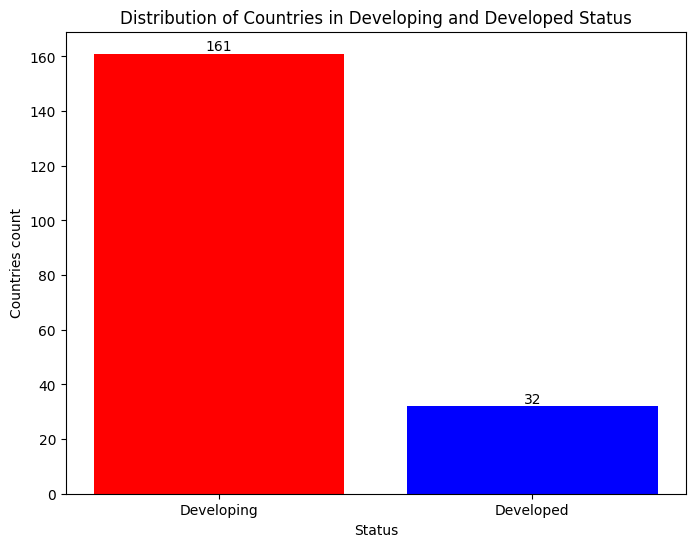

In [22]:
developing_countries = df[df['Status'] == 'Developing']['Country'].unique()
developed_countries = df[df['Status'] == 'Developed']['Country'].unique()

# chart
plt.figure(figsize=(8, 6))
bars  = plt.bar(['Developing', 'Developed'], [len(developing_countries), len(developed_countries)], color=['red', 'blue'])
plt.title('Distribution of Countries in Developing and Developed Status')
plt.xlabel('Status')
plt.ylabel('Countries count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- It can be seen that the number of developing countries accounts for the majority of countries in the world when there are up to 160 developing countries, but on the contrary, only more than 30 countries are considered developed.

- Although the difference is very large, objectively speaking, the number of such developed countries from 2000 to 2015 is considered a quite large number.

**Before examining the changes in the average GDP of the two national regions, we will briefly review which countries are considered developed.**

In [23]:
developed_data = df[df['Status'] == 'Developed']
developing_data = df[df['Status'] == 'Developing']

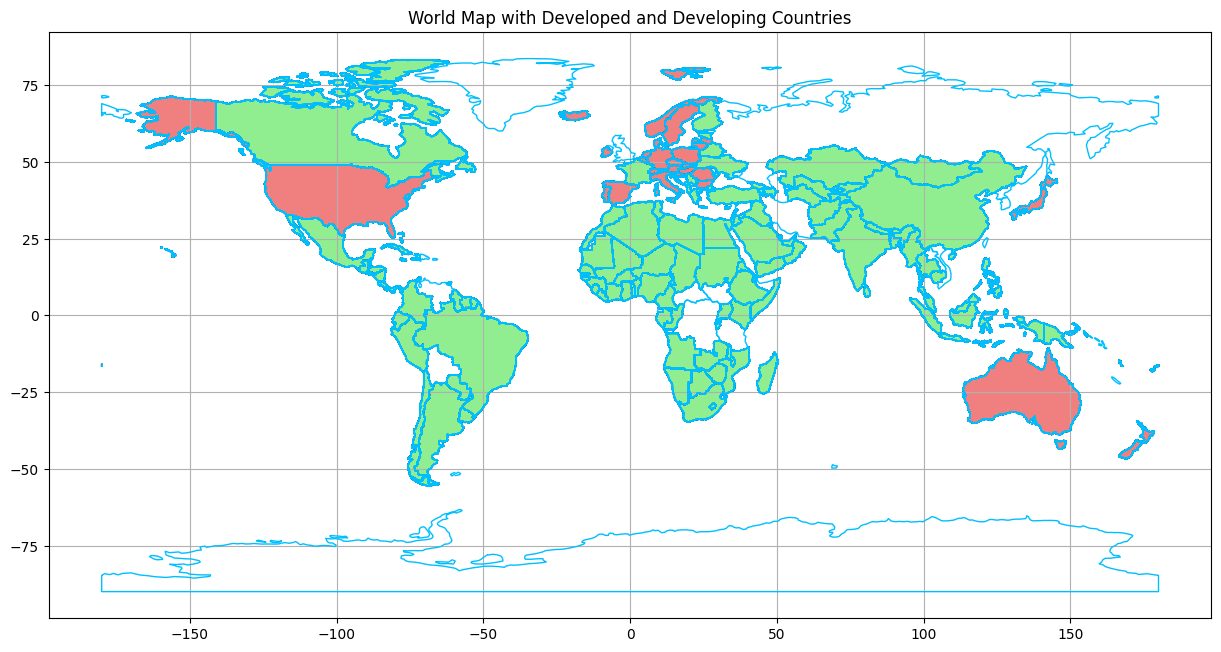

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge 
world = world.merge(developed_data, how='left', left_on='name', right_on='Country')
world = world.merge(developing_data, how='left', left_on='name', right_on='Country', suffixes=('_developed', '_developing'))

# World_map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='deepskyblue')

world[world['Status_developing'] == 'Developing'].plot(ax=ax, color='lightgreen', edgecolor='black')
world[world['Status_developed'] == 'Developed'].plot(ax=ax, color='lightcoral', edgecolor='black')

# add coordinate grid
ax.grid(True)

plt.title('World Map with Developed and Developing Countries')
plt.show()


Based on the worldmap, it can be seen as follows:

- Most countries considered developed are mainly located in Europe.

- In addition, some recognized and quite famous countries are the US, Japan, and Australia.


- Most countries in Asia and Africa are in a developing state

**Now, we will see into the different between GDP of each region**

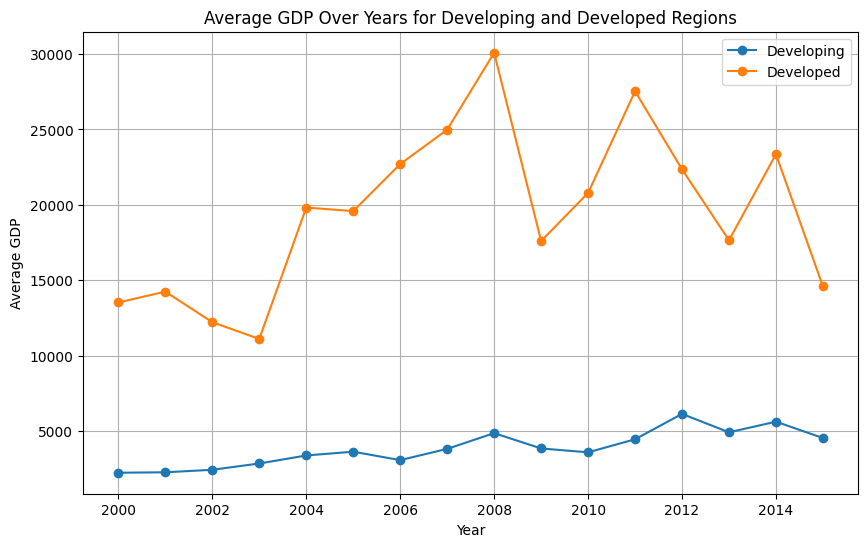

In [25]:
##TODO

# calculate gdp over year
avg_developing = developing_data.groupby('Year')['GDP'].mean()
avg_developed = developed_data.groupby('Year')['GDP'].mean()

# plot chart
plt.figure(figsize=(10, 6))
plt.plot(avg_developing.index, avg_developing.values, label='Developing', marker='o')
plt.plot(avg_developed.index, avg_developed.values, label='Developed', marker='o')

plt.title('Average GDP Over Years for Developing and Developed Regions')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend()
plt.grid(True)
plt.show()

**Observation**

- Based on the graph, we see that the difference in GDP levels between the two national regions is very large.

- As for developing countries, on average, the growth rate of these countries is relatively stable and tends to increase but not too suddenly.

- For developed countries, the average GDP level of developed countries is very different from that of undeveloped countries. At low times, the lowest GDP level is still almost double that of developing countries.

- In addition, changes in GDP levels of developed countries are almost unstable, as fluctuations occur continuously.

**Question 2: What are the differences between the two status countries in terms of substance use (specifically alcohol) and HIV/AIDS prevalence? ?**
- **Meaning**: After understanding the economic structure of these two countries, we will learn about the level of stimulant use and its effects as well as the level of HIV infection. /AIDS to have an objective view on whether economic development is the basis for improving the quality of human life? From there, in the next sections, we will go deeper into the issue of longevity and there we will have the most accurate view.

- **Idea**: Because the level of HIV/AIDS infection and the level of alcohol consumption will indicate a country's negative status in terms of social evils and adverse health effects, we will use Use a column chart and compare each year between these two status countries. 

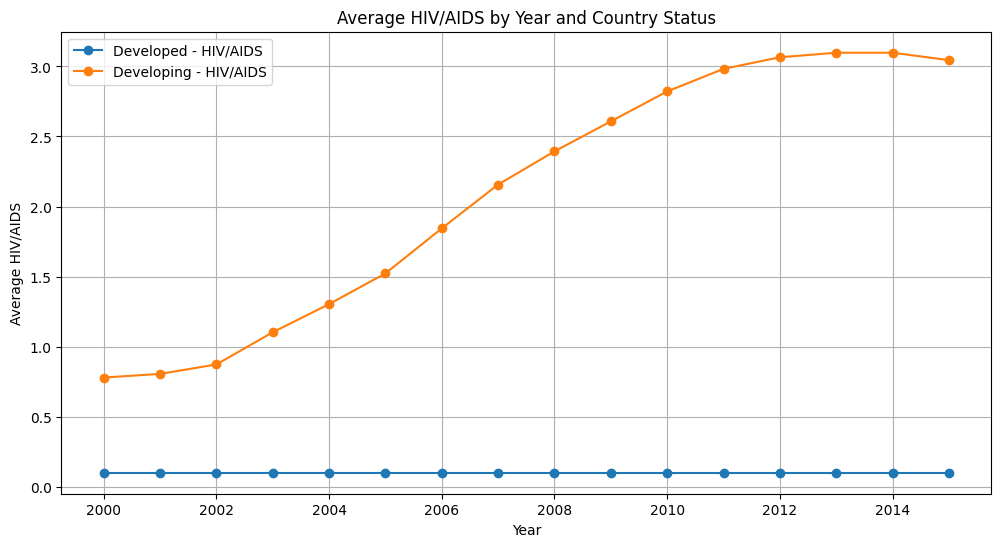

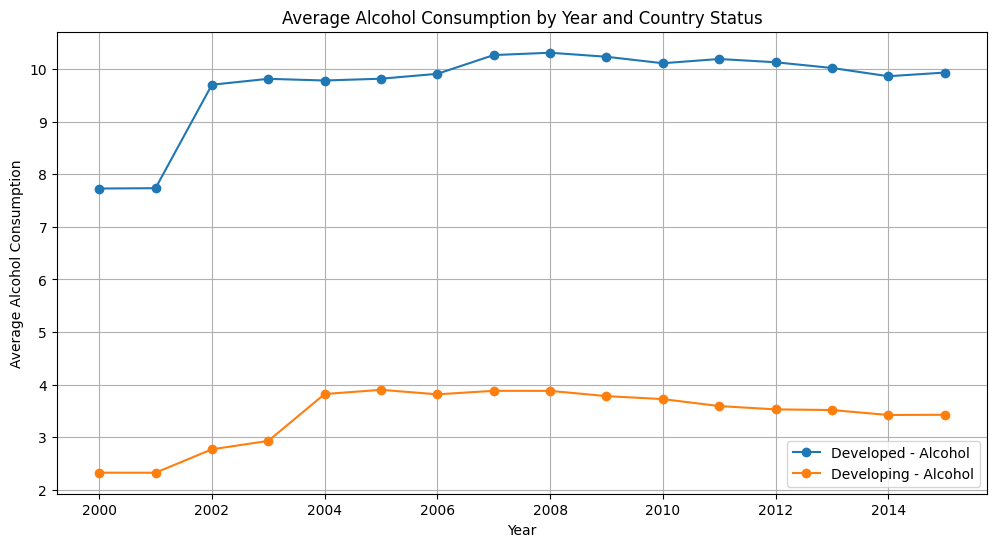

In [29]:
##TODO
years = df['Year'].unique()

# HIV/AIDS
plt.figure(figsize=(12, 6))
for status, data in [('Developed', developed_data), ('Developing', developing_data)]:
    hiv_aids_values = data.groupby('Year')['HIV/AIDS'].mean()
    plt.plot(years, hiv_aids_values, label=f'{status} - HIV/AIDS', marker='o')

plt.title('Average HIV/AIDS by Year and Country Status')
plt.xlabel('Year')
plt.ylabel('Average HIV/AIDS')
plt.legend()
plt.grid(True)
plt.show()

# alcohol
plt.figure(figsize=(12, 6))
for status, data in [('Developed', developed_data), ('Developing', developing_data)]:
    alcohol_values = data.groupby('Year')['Alcohol'].mean()
    plt.plot(years, alcohol_values, label=f'{status} - Alcohol', marker='o')

plt.title('Average Alcohol Consumption by Year and Country Status')
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption')
plt.legend()
plt.grid(True)
plt.show()

**Question 3: ...**
- **Meaning**
- **Idea**

In [27]:
##TODO

**Question 4: ...**
- **Meaning**
- **Idea**

In [25]:
##TODO

**Question 5: ...**
- **Meaning**
- **Idea**

In [24]:
##TODO

**Question 6: ...**
- **Meaning**
- **Idea**

In [25]:
##TODO

---

## **Reflection** <a name="reflection"></a>

#### **Difficulties encountered:**
- Tran Huy Ban:
    - a
    - b
    - c
- Nguyen Minh Quan:
    - a
    - b
    - c

#### **Knowledge learned:**
- Tran Huy Ban:
    - a
    - b
    - c
- Nguyen Minh Quan:
    - a
    - b
    - c

#### **What would we do if we had more time?**
-
-
-

---

## **References** <a name="references"></a>